In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
dataset= pd.read_csv('/content/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
dataset.isnull().sum().sum()

np.int64(0)

In [6]:
X = dataset.drop('target', axis=1)
y = dataset['target']

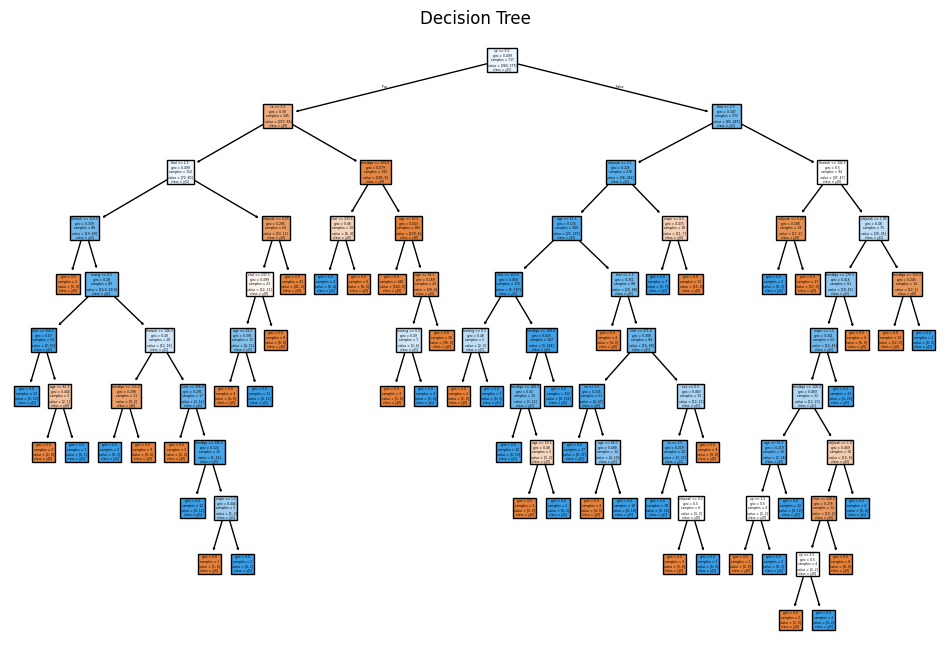

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree")
plt.show()

In [8]:
dtree_small = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_small.fit(X_train, y_train)
y_pred_dtree = dtree_small.predict(X_test)
print("Decision Tree Accuracy (max_depth=3):", accuracy_score(y_test, y_pred_dtree))

Decision Tree Accuracy (max_depth=3): 0.8051948051948052


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

Random Forest Accuracy: 0.9805194805194806

Feature Importances:
     Feature  Importance
2         cp    0.137449
12      thal    0.124648
9    oldpeak    0.121049
11        ca    0.115843
7    thalach    0.111869
4       chol    0.080685
0        age    0.079323
3   trestbps    0.068920
10     slope    0.052229
8      exang    0.044662
1        sex    0.033707
6    restecg    0.019299
5        fbs    0.010316


In [10]:
cv_scores_dtree = cross_val_score(dtree_small, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree Cross-Validation Accuracy:", cv_scores_dtree.mean())
print("Random Forest Cross-Validation Accuracy:", cv_scores_rf.mean())



Decision Tree Cross-Validation Accuracy: 0.8302439024390245
Random Forest Cross-Validation Accuracy: 0.9941463414634146
